#                                    Product Recommendation System 

#               
                                Rating Based Product Recommendation system - I
                

# Dataset : Amazon product review dataset
https://www.kaggle.com/skillsmuggler/amazon-ratings

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [3]:
ratings = pd.read_csv("C://Users//NITHIN SYLESH//Documents//int//feynn//ratings_Beauty.csv")
ratings1 = ratings.dropna()
ratings1.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [4]:
ratings1.shape



(2023070, 4)

In [4]:
ratings1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 77.2+ MB


In [5]:
ratings1['Rating'].describe().transpose()

count    2.023070e+06
mean     4.149036e+00
std      1.311505e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [7]:
print('Minimum rating is: %d' %(ratings1.Rating.min()))
print('Maximum rating is: %d' %(ratings1.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


In [8]:
#Check for missing values
print('Number of missing values across columns: \n',ratings1.isnull().sum())

Number of missing values across columns: 
 UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64


In [6]:
popular_products = pd.DataFrame(ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


In [7]:
most_popular.describe()

,Rating
count,249274.000000
mean,8.115848
std,36.064113
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,7533.000000


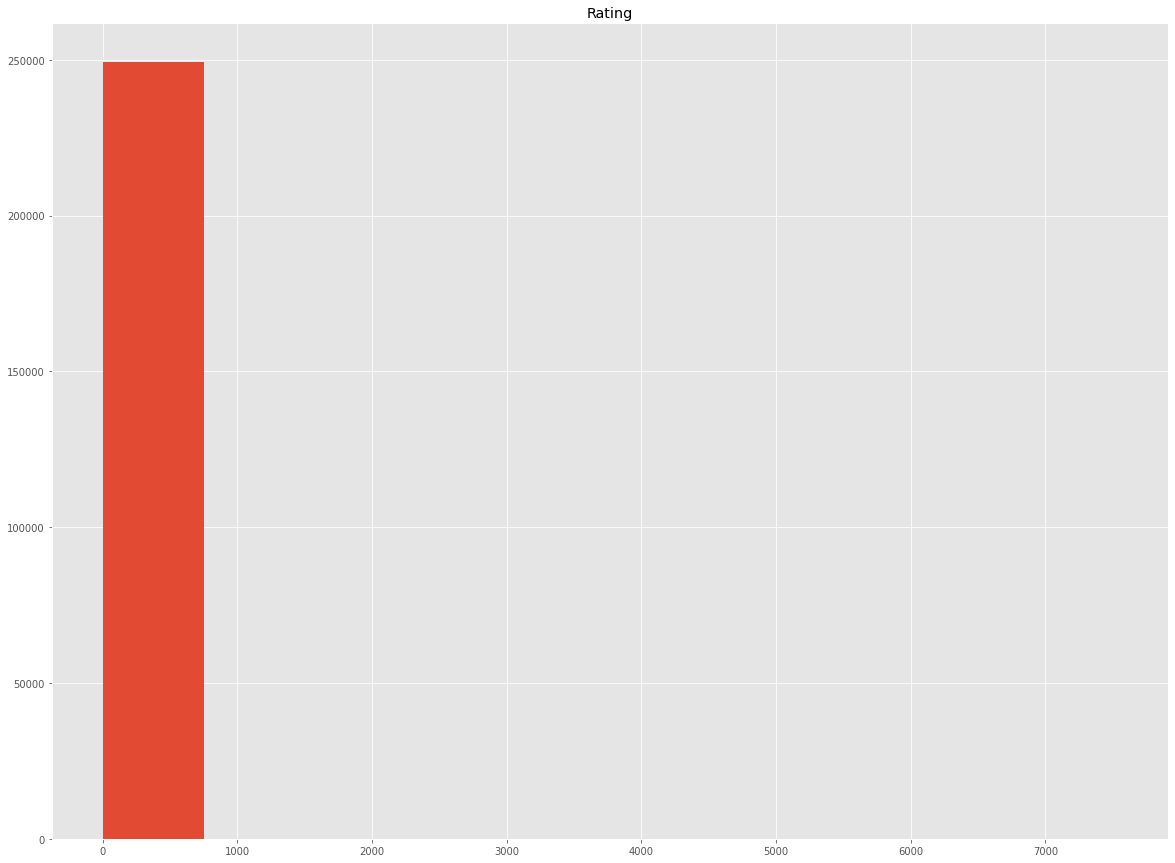

In [8]:
most_popular.hist(figsize=(20, 15))
plt.show()

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


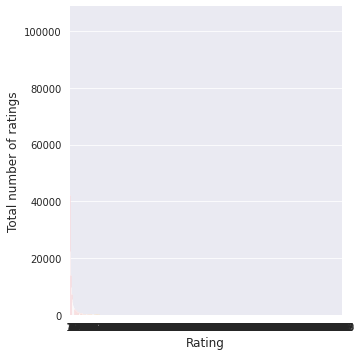

In [22]:
with sns.axes_style('darkgrid'):
    g = sns.catplot("Rating", data=most_popular, aspect=1,kind='count')
    g.set_ylabels("Total number of ratings") 

<AxesSubplot:ylabel='Rating'>

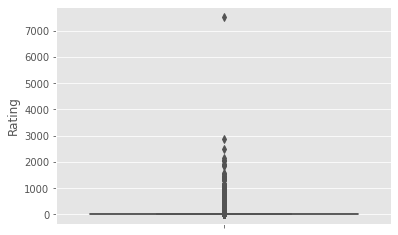

In [9]:
sns.boxplot(y='Rating',data=most_popular)

<AxesSubplot:xlabel='ProductId'>

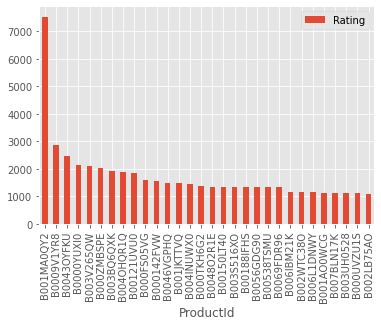

In [8]:
most_popular.head(30).plot(kind = "bar")

Analysis:

    The above graph gives us the most popular products (arranged in descending order) sold by the business.


#            
                                     Model-based Product Recommendation - II
            

In [9]:
ratings2 = amazon_ratings.head(1000)

In [10]:
ratings_utility_matrix = ratings2.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,9788077315,9788077382,9788077625,9788077927,978807801X,9788078389,9788078885,9788078893,9788078907,978807894X
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A05492663T95KW63BR75K,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A100GYE1W4OXZ8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A10205RFE66H1R,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
ratings_utility_matrix.shape

(948, 261)

In [12]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A05492663T95KW63BR75K,A100GYE1W4OXZ8,A10205RFE66H1R,A104D62WJII6KP,A108HJD2ESJXUY,A10GKM76NOQLGE,A10R4813UIW6GH,A10REFE1TW3ZVT,...,AYI1LDJYGG0ZK,AYM7E80UCJX7I,AYTK85H56WQ5F,AYYB9EFFG2GVA,AZ4FR14IPKML7,AZGGH4GS18RUN,AZLE2XFH3JUNG,AZLYAJ8XE443K,AZWRTJPN7NXT,AZYQEFB9Y5N22
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X.shape

(261, 948)

In [14]:
X1 = X

In [15]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(261, 10)

In [16]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(261, 261)

In [17]:
X.index[102]

'6162071103'

In [18]:
i = "6162071103"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

102

In [19]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(261,)

In [22]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:5]

['7899120217', '8430539387', '9744287233']

#       
                               Search engine based product  recommendation system - III
       

# Dataset : Home Depot's dataset with product dataset.
https://www.kaggle.com/c/home-depot-product-search-relevance/data       

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [12]:
product_descriptions = pd.read_csv("C://Users//NITHIN SYLESH//Documents//int//feynn//product_descriptions.csv")
product_descriptions.shape

(124428, 2)

In [15]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [16]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [17]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

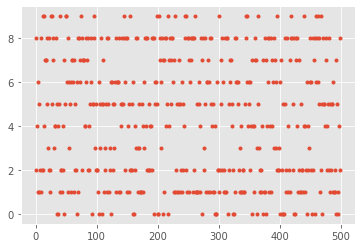

In [18]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [19]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Output:

    Recommendation of product based on the current product selected by         user.
    
    To recommend related product based on, Frequently bought together.

In [20]:
# Optimal clusters is 

true_k = 50

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 silicone
 flap
 100
 face
 pets
 breathing
 pet
 seal
 door
 sensing
Cluster 1:
 fan
 light
 speed
 ceiling
 nickel
 help
 blades
 brushed
 control
 hampton
Cluster 2:
 sheet
 repair
 cut
 metal
 shower
 form
 patching
 piecesteel
 altered
 sizes
Cluster 3:
 switch
 led
 light
 cabinet
 fixtures
 mounting
 sticks
 watt
 task
 wall
Cluster 4:
 power
 volt
 watt
 amp
 engine
 inverter
 generator
 output
 solar
 fuses
Cluster 5:
 landscape
 edging
 anchoring
 stakes
 ziplevel
 pavestone
 curved
 pallet
 paver
 proflex
Cluster 6:
 bamboo
 fencing
 galvanized
 reed
 fence
 ft
 gates
 wire
 steel
 using
Cluster 7:
 post
 bulb
 light
 watt
 cedar
 red
 incandescent
 use
 fence
 thdv36
Cluster 8:
 tool
 depth
 flex
 csst
 holder
 stop
 exhaust
 drill
 brackets
 mounting
Cluster 9:
 tape
 film
 painting
 shrink
 scotch
 masking
 loops
 surfaces
 window
 tuff
Cluster 10:
 paint
 waxes
 wood
 finish
 following
 using
 americana
 chalky
 look
 ct
Cluster 11:
 was

In [21]:
#Predicting clusters based on key search words
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [22]:
show_recommendations("spray paint")

Cluster 28:
 roller
 paint
 brush
 frame
 dog
 tray
 angled
 paints
 handle
 rollers


Keyword : spray paint

In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word.

Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.

In [23]:
show_recommendations("water")

Cluster 12:
 water
 heater
 gas
 oven
 valve
 burner
 cooking
 nox
 low
 quality


In [24]:
show_recommendations("steel drill")

Cluster 46:
 metal
 screw
 drill
 screws
 azek
 hole
 gauge
 steel
 fastening
 pre


In [25]:
show_recommendations("spray paint")

Cluster 28:
 roller
 paint
 brush
 frame
 dog
 tray
 angled
 paints
 handle
 rollers


In [26]:
show_recommendations("cutting tool")

Cluster 15:
 cutting
 pole
 pruner
 saw
 umbrella
 pruning
 branches
 canopy
 blade
 reach
